# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [1]:
import sys

sys.path.append("../../..")

In [2]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [3]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

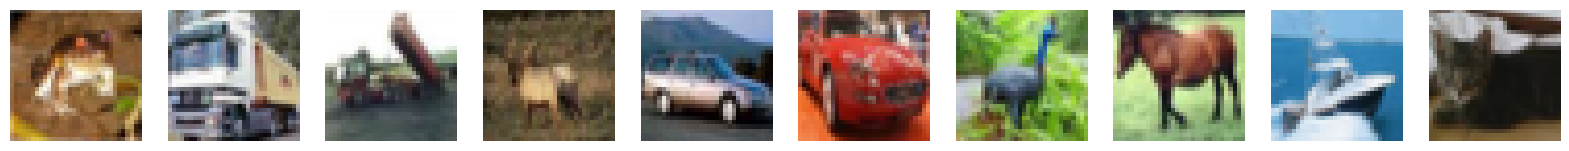

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [7]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=6, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=4, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

2024-01-16 13:09:54.733359: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-16 13:09:54.733403: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-16 13:09:54.733419: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-16 13:09:54.733661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-16 13:09:54.734007: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        3488      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        16416     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                            

## 3. Train the model <a name="train"></a>

In [8]:
#opt = optimizers.Adam(learning_rate=0.0005)
# for M1 Macs
opt = optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [9]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10


2024-01-16 13:09:59.683764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 175s 102ms/step - loss: 1.5662 - accuracy: 0.4498 - val_loss: 1.3563 - val_accuracy: 0.5300
Epoch 2/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.1665 - accuracy: 0.5918 - val_loss: 1.3389 - val_accuracy: 0.5580
Epoch 3/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.0097 - accuracy: 0.6485 - val_loss: 1.0538 - val_accuracy: 0.6247
Epoch 4/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.9188 - accuracy: 0.6783 - val_loss: 0.9185 - val_accuracy: 0.6727
Epoch 5/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.8526 - accuracy: 0.7025 - val_loss: 1.0946 - val_accuracy: 0.6277
Epoch 6/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.8084 - accuracy: 0.7173 - val_loss: 0.9290 - val_accuracy: 0.6734
Epoch 7/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.7610 - accuracy: 0.7336 - val_loss: 1.0367 - va

## 4. Evaluation <a name="evaluate"></a>

In [10]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 3s 107ms/step - loss: 0.8259 - accuracy: 0.7140


[0.8259490132331848, 0.7139999866485596]

In [11]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 3s 6ms/step


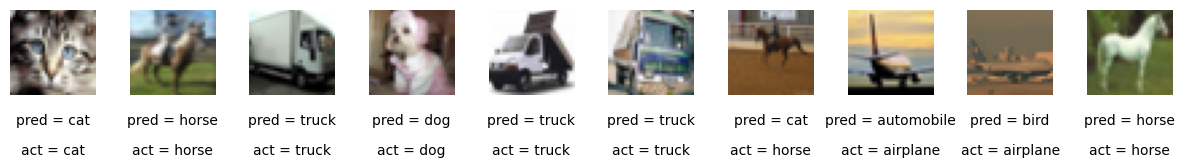

In [12]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

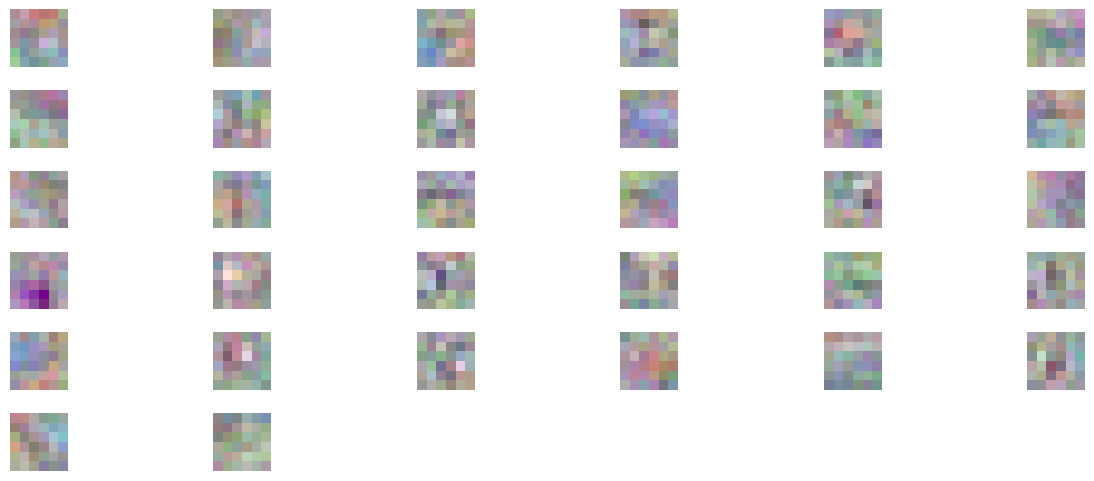

In [14]:
# visualizing the conv filters from the first layer
from tensorflow.keras import backend as K

layer_name = "conv2d"
# Get the weights of the first conv layer
weights = model.get_layer(layer_name).get_weights()[0]

# Normalize the weights to be between 0 and 1
weights = (weights - weights.min()) / (weights.max() - weights.min())

# Plot the filters
n_filters = weights.shape[-1]
n_col = 6
n_row = int(np.ceil(n_filters / n_col))

fig = plt.figure(figsize=(15, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_filters):
    img = weights[:, :, :, i]
    ax = fig.add_subplot(n_row, n_col, i + 1)
    ax.axis("off")
    ax.imshow(img)

